In [37]:
import time
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans

In [48]:
loan = pd.read_csv("loan.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
df = DataFrame(loan,columns=['ApplicantIncome','LoanAmount'])
df = df.dropna()
df

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


## K-Means Clustering

In [50]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[12462.92957746   247.63380282]
 [49544.42857143   383.14285714]
 [ 3828.14980545   129.20622568]]


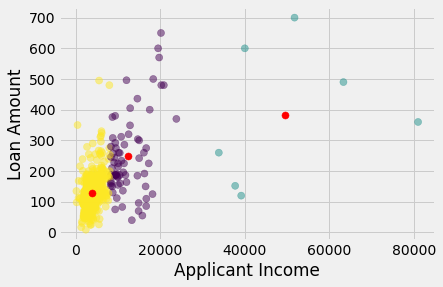

In [51]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [42]:
df2 = DataFrame(loan,columns=['ApplicantIncome','Loan_Amount_Term'])
df2 = df2.dropna()

In [43]:
df2

,ApplicantIncome,Loan_Amount_Term
0,5849,360.0
1,4583,360.0
2,3000,360.0
3,2583,360.0
4,6000,360.0
...,...,...
609,2900,360.0
610,4106,180.0
611,8072,360.0
612,7583,360.0


In [44]:
kmeans = KMeans(n_clusters=3).fit(df2)
centroids = kmeans.cluster_centers_
print(centroids)

[[12557.18918919   343.78378378]
 [49544.42857143   300.        ]
 [ 3822.43352601   342.31213873]]


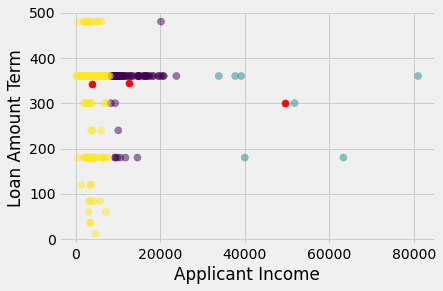

In [45]:
plt.scatter(df2['ApplicantIncome'], df2['Loan_Amount_Term'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount Term')
plt.show()

## Random Forest

In [10]:
loan2 = loan.drop(columns=['CoapplicantIncome','Loan_ID'])
loan2 = loan2.dropna()
loan2 = pd.get_dummies(loan2)
loan2

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,128.0,360.0,1.0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,66.0,360.0,1.0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,120.0,360.0,1.0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,141.0,360.0,1.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
5,5417,267.0,360.0,1.0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,360.0,1.0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
610,4106,40.0,180.0,1.0,0,1,0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,253.0,360.0,1.0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
612,7583,187.0,360.0,1.0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1


In [11]:
labels = np.array(loan2['LoanAmount'])
loan2= loan2.drop('LoanAmount', axis = 1)
loan2_list = list(loan2.columns)
loan2=np.array(loan2)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_loan2, test_loan2, train_labels, test_labels = train_test_split(loan2, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Loan2 Shape:', train_loan2.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Loan2 Shape:', test_loan2.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Loan2 Shape: (360, 20)
Training Labels Shape: (360,)
Testing Loan2 Shape: (120, 20)
Testing Labels Shape: (120,)


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_loan2, train_labels);

In [17]:
predictions = rf.predict(test_loan2)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars')

Mean Absolute Error: 46.86 dollars


In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.tree import export_graphviz
import pydot

In [22]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = loan2_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [24]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_loan2, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = loan2_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

## Variable Importances

In [25]:
%matplotlib inline

<Figure size 1008x1152 with 0 Axes>

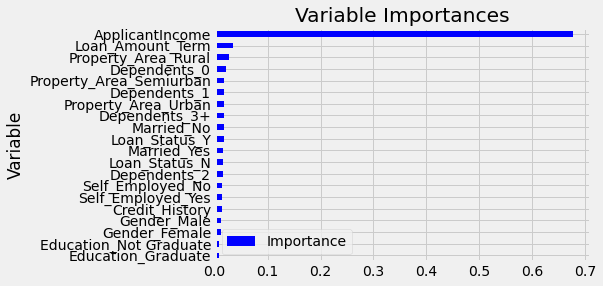

In [35]:
plt.figure(figsize=(14,16))
df3=pd.DataFrame({'Variable':loan2_list,'Importance':rf.feature_importances_})
df3.sort_values('Importance',inplace=True)
df3.plot(kind='barh',y='Importance',x='Variable',color='b',title='Variable Importances')